In [17]:
import pandas as pd
# Replace with your actual file path
file_path = "C:\\Users\\user\\Documents\\LLM-from-scratch\\SRET\\Cr3+-activated phosphors-Weak field.xlsx"
# Read the Excel file
df = pd.read_excel(file_path,skiprows=3)


In [18]:

df.head()  # Display first few rows

,No.,Formula,Prototype structure,crystal system,space group,host cation site,Coordination number (CN),ionic radius (Å),cif. (+) or not (-),single site (+) or not (-),...,4A2 → 4T1 (4F) maximum (eV),4A2 → 4T2 maximum (nm),4A2 → 4T2 maximum (eV),2Eg → 4A2 maximum (nm),2Eg → 4A2 maximum (eV),4T2 → 4A2 maximum (nm),4T2 → 4A2 maximum (eV),DOI,data measurement method,Unnamed: 33
0,FC-001,Cs2KGaF6,double perovskite,cubic,Fm-3m,Ga3+,6.0000,0.62,-,+,...,2.824601,634.0,1.955836,NaN,NaN,782.0,1.585678,10.1039/d2tc02020c,Experimental,室温实验光谱数据
1,FC-002,Cs2KInF6,double perovskite,cubic,Fm-3m,In3+,6.0000,0.8,-,+,...,2.774049,621.0,1.996779,NaN,NaN,794.0,1.561713,10.1021/acs.jpclett.3c00089,Experimental,室温实验光谱数据
2,FC-003,Cs2NaAl3F12,NaN,trigonal,R-3m,Al3+,5.8876,0.53,+,+,...,2.890443,597.0,2.077052,NaN,NaN,750.0,1.653333,10.1021/acs.inorgchem.3c00789,Experimental,室温实验光谱数据
3,FC-004,Cs2NaAlF6,double perovskite,cubic,Fm-3m,Al3+,6.0000,0.53,+,+,...,2.811791,626.0,1.980831,NaN,NaN,710.0,1.746479,10.1016/S0038-1098(00)00107-1,Experimental,低温实验光谱数据 (77K)
4,FC-005,Cs2NaGaF6,double perovskite,cubic,Fm-3m,Ga3+,6.0000,0.62,+,+,...,2.850575,625.0,1.984000,NaN,NaN,789.0,1.571610,10.1016/j.jallcom.2023.171957,Experimental,室温实验光谱数据


In [ ]:
# --- Step 1: Check for missing values ---
print("Missing values per column:")
print(df.isnull().sum())

# --- Step 2: Drop rows with missing values ---
df_clean = df.dropna(subset=['Dq (cm-1)', 'B (cm-1)', 'C (cm-1)', 'E(2E)ZPL (eV) '])

# --- Step 3: Convert all to numeric (if needed) ---
cols = ['Dq (cm-1)', 'B (cm-1)', 'C (cm-1)', 'E(2E)ZPL (eV) ']
df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce')


Missing values per column:
No.                              0
Formula                          0
Prototype structure             71
crystal system                   0
space group                      0
host cation site                 0
Coordination number (CN)         0
 ionic radius (Å)                1
cif. (+) or not (-)              0
single site (+) or not (-)       2
E(2E)ZPL (eV)                    5
E(4T2) ZPL (eV)                  0
E(4T1)ZPL (eV)                   2
B (eV)                           5
B (cm-1)                         5
C (eV)                           5
C (cm-1)                         5
Dq (eV)                          0
Dq (cm-1)                        0
Dq/B                             5
β1                               5
4A2 → 4T1 (4P) maximum (nm)    126
4A2 → 4T1 (4P) maximum (eV)    127
4A2 → 4T1 (4F) maximum (nm)      1
4A2 → 4T1 (4F) maximum (eV)      1
4A2 → 4T2      maximum (nm)      1
4A2 → 4T2 maximum (eV)           1
2Eg → 4A2 maximum (nm)      

C:\Users\user\AppData\Local\Temp\ipykernel_19512\128471352.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce')


In [25]:
print(df_clean.isnull().sum())

No.                              0
Formula                          0
Prototype structure             70
crystal system                   0
space group                      0
host cation site                 0
Coordination number (CN)         0
 ionic radius (Å)                1
cif. (+) or not (-)              0
single site (+) or not (-)       2
E(2E)ZPL (eV)                    0
E(4T2) ZPL (eV)                  0
E(4T1)ZPL (eV)                   0
B (eV)                           0
B (cm-1)                         0
C (eV)                           0
C (cm-1)                         0
Dq (eV)                          0
Dq (cm-1)                        0
Dq/B                             0
β1                               0
4A2 → 4T1 (4P) maximum (nm)    124
4A2 → 4T1 (4P) maximum (eV)    125
4A2 → 4T1 (4F) maximum (nm)      0
4A2 → 4T1 (4F) maximum (eV)      0
4A2 → 4T2      maximum (nm)      0
4A2 → 4T2 maximum (eV)           0
2Eg → 4A2 maximum (nm)         226
2Eg → 4A2 maximum (e

Linear Regression:
 MAE=0.00, RMSE=0.00, R²=1.00

Robust Regression:
 MAE=0.00, RMSE=0.01, R²=0.99

Lasso Regression:
 MAE=0.00, RMSE=0.00, R²=1.00

Ridge Regression:
 MAE=0.00, RMSE=0.00, R²=1.00

ElasticNet:
 MAE=0.00, RMSE=0.00, R²=1.00

Decision Tree:
 MAE=0.00, RMSE=0.01, R²=0.99

Random Forest:
 MAE=0.00, RMSE=0.01, R²=0.99



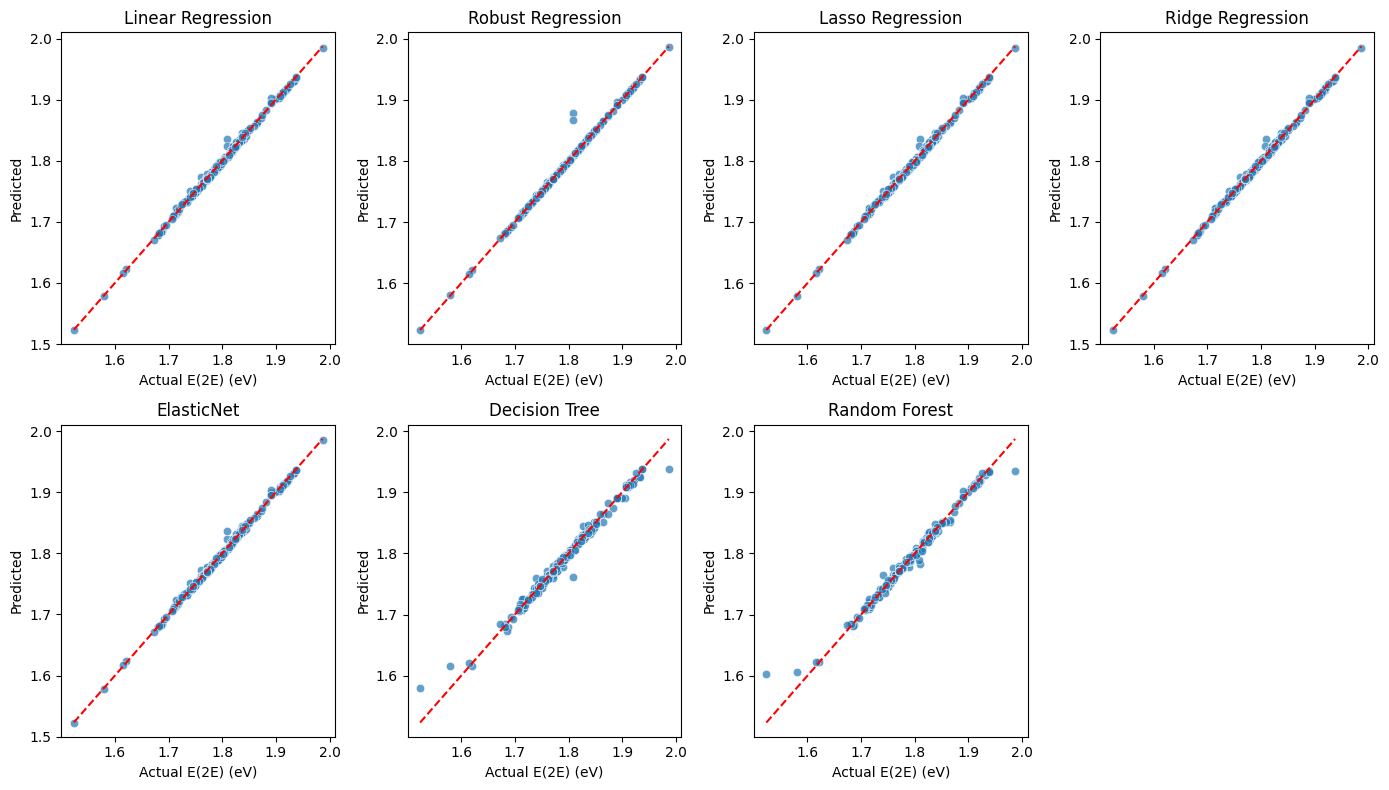

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, HuberRegressor, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

df = df_clean 

# --- Select Features and Target ---
X = df[['Dq (cm-1)', 'B (cm-1)', 'C (cm-1)']]
y = df['E(2E)ZPL (eV) ']

# --- Initialize Models ---
models = {
    'Linear Regression': LinearRegression(),
    'Robust Regression': HuberRegressor(),
    'Lasso Regression': Lasso(alpha=0.01),
    'Ridge Regression': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# --- Evaluation Function ---
def evaluate_model(name, model, X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=kf)
    
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"{name}:\n MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}\n")
    
    return {
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'y_pred': y_pred
    }

# --- Run and Collect Results ---
results = []
for name, model in models.items():
    res = evaluate_model(name, model, X, y)
    results.append(res)

# --- Plot Predicted vs Actual ---
plt.figure(figsize=(14, 8))
for i, res in enumerate(results):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=y, y=res['y_pred'], alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(res['Model'])
    plt.xlabel("Actual E(2E) (eV)")
    plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

In [27]:
model = LinearRegression().fit(X, y)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Dq (cm-1): 0.0000
B (cm-1): 0.0001
C (cm-1): 0.0005


In [ ]:
df['Dq_B'] = df['Dq (cm-1)'] / df['B (cm-1)']
X = df[['Dq (cm-1)', 'B (cm-1)', 'C (cm-1)', 'Dq_B']]

C:\Users\user\AppData\Local\Temp\ipykernel_19512\2791719164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dq_B'] = df['Dq (cm-1)'] / df['B (cm-1)']


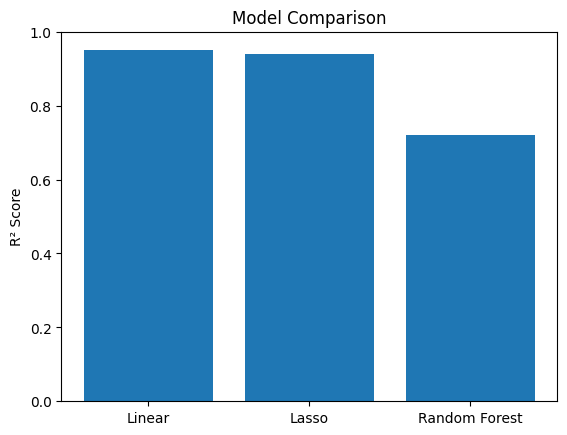

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear', 'Lasso', 'Random Forest', 'ElasticNet', 'Ridge', 'Decision Tree']
r2_scores = [0.95, 0.94, 0.72]
plt.bar(models, r2_scores)
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()


In [30]:
new_material = pd.DataFrame({
    'Dq (cm-1)': [2100],
    'B (cm-1)': [600],
    'C (cm-1)': [3800]
})
predicted_E2E = model.predict(new_material)
print("Predicted E(2E):", predicted_E2E[0], "eV")


Predicted E(2E): 2.051882434005769 eV
